#Stock Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
# Load the stock data
df = pd.read_csv('stock.csv')
df.drop(['Unnamed: 0'], axis=1, inplace = True)

df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-03-17,0.927141,0.908554,0.0,0.917847,1158040.1,0.520855
1,1980-03-18,0.930239,0.914749,0.0,0.927141,1622063.1,0.525637
2,1980-03-19,0.942631,0.927141,0.0,0.942631,1367859.1,0.533608
3,1980-03-20,0.961218,0.939533,0.0,0.939533,3046412.1,0.532014
4,1980-03-21,0.948826,0.936435,0.0,0.936435,1020851.1,0.530420


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10752 entries, 0 to 10751
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10752 non-null  object 
 1   High       10752 non-null  float64
 2   Low        10752 non-null  float64
 3   Open       10752 non-null  float64
 4   Close      10752 non-null  float64
 5   Volume     10752 non-null  float64
 6   Adj Close  10752 non-null  float64
dtypes: float64(6), object(1)
memory usage: 588.1+ KB


In [4]:
df['Date'] = df['Date'].astype('datetime64')

In [5]:
df.select_dtypes('number').describe()

,High,Low,Open,Close,Volume,Adj Close
count,10752.000000,10752.000000,10752.000000,10752.000000,1.075200e+04,10752.000000
mean,45.513600,44.666703,44.896936,45.118323,2.063540e+06,37.623797
std,53.810046,52.828649,53.398649,53.349075,1.417562e+06,52.196452
min,0.927141,0.908554,0.000000,0.911652,8.070100e+03,0.517667
25%,5.552316,5.462476,5.415141,5.527532,1.196101e+06,3.176103
50%,33.055778,32.219095,32.515629,32.714761,1.758100e+06,21.508132
75%,49.033276,48.300176,48.529410,48.728345,2.552245e+06,37.441774
max,261.689996,259.649988,260.369995,261.040002,3.133089e+07,259.917322


In [6]:
df[df['Open'] == 0]

,Date,High,Low,Open,Close,Volume,Adj Close
0,1980-03-17,0.927141,0.908554,0.0,0.917847,1158040.1,0.520855
1,1980-03-18,0.930239,0.914749,0.0,0.927141,1622063.1,0.525637
2,1980-03-19,0.942631,0.927141,0.0,0.942631,1367859.1,0.533608
3,1980-03-20,0.961218,0.939533,0.0,0.939533,3046412.1,0.532014
4,1980-03-21,0.948826,0.936435,0.0,0.936435,1020851.1,0.530420
...,...,...,...,...,...,...,...
767,1983-03-29,1.933961,1.921569,0.0,1.921569,714192.1,1.037358
768,1983-03-30,1.933961,1.921569,0.0,1.927765,1190320.1,1.040546
769,1983-03-31,1.940157,1.896786,0.0,1.921569,788839.1,1.037358
770,1983-04-04,1.933961,1.834828,0.0,1.847219,1258915.1,0.999098


In [7]:
df = df[df['Open'] != 0].reset_index(drop=True)

In [8]:
df.shape

(9980, 7)

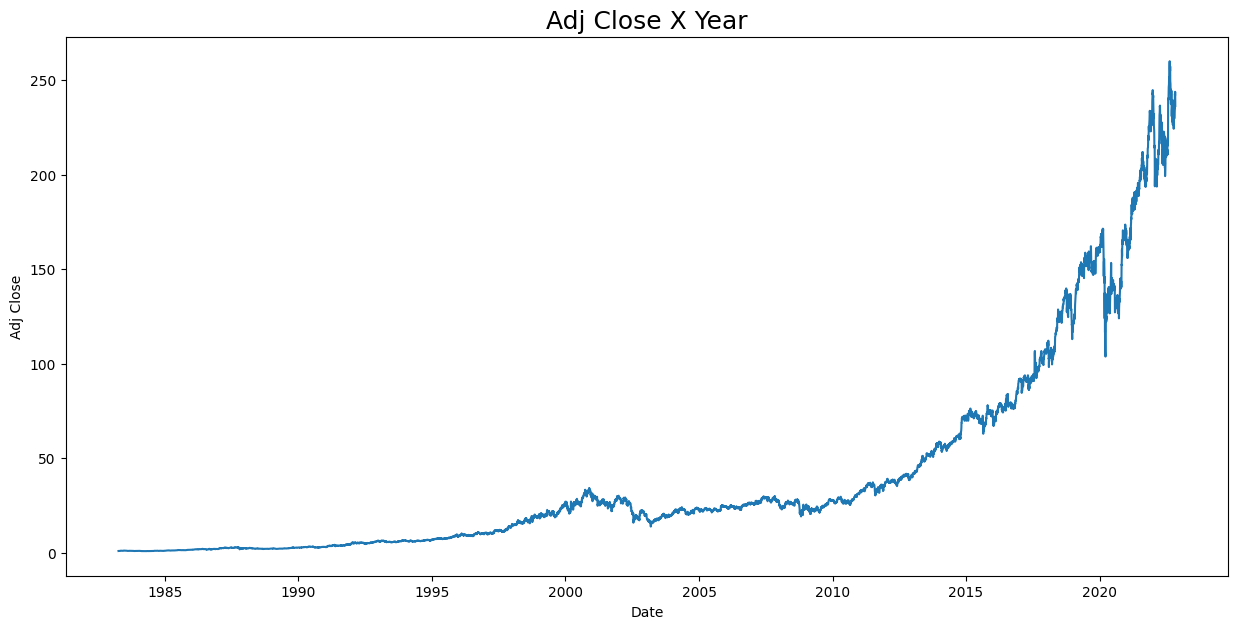

In [9]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(data = df, x = 'Date', y = 'Adj Close')
plt.title('Adj Close X Year', fontsize = 18)
plt.show()

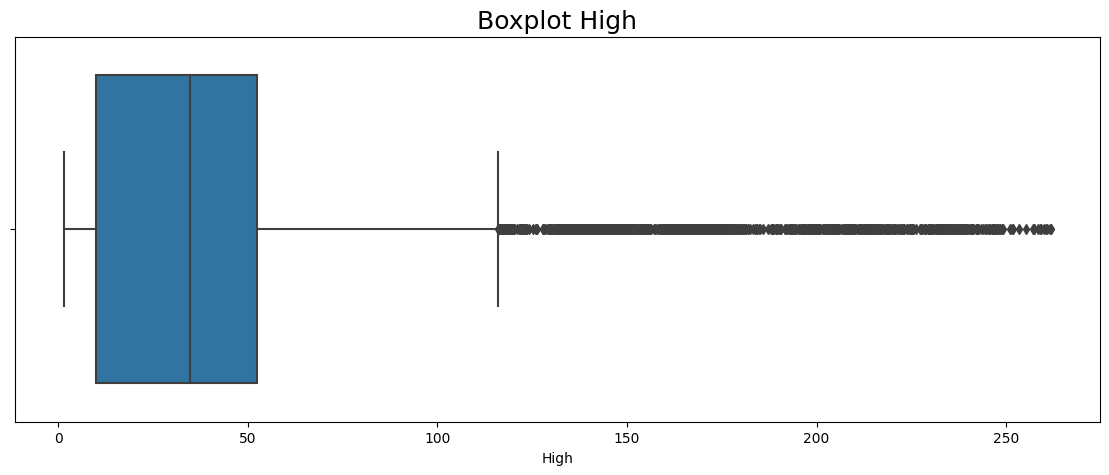

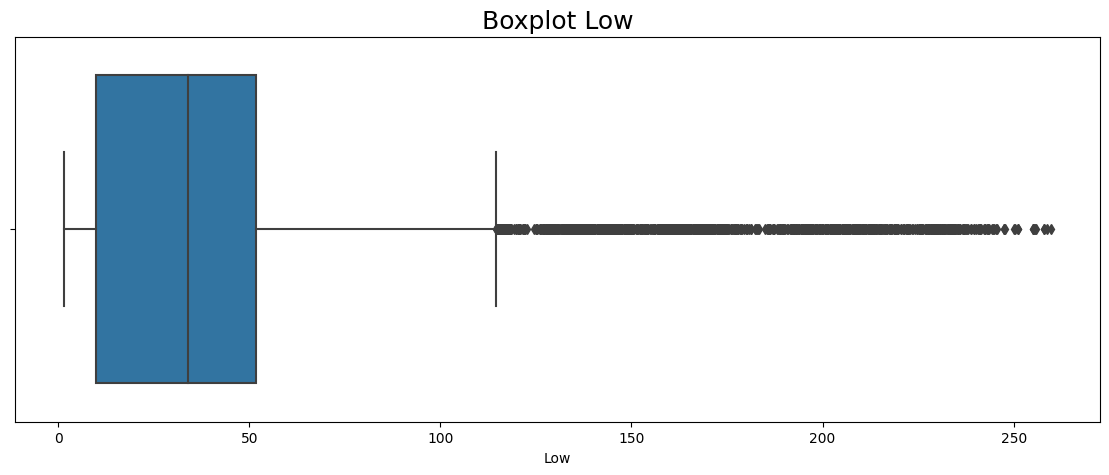

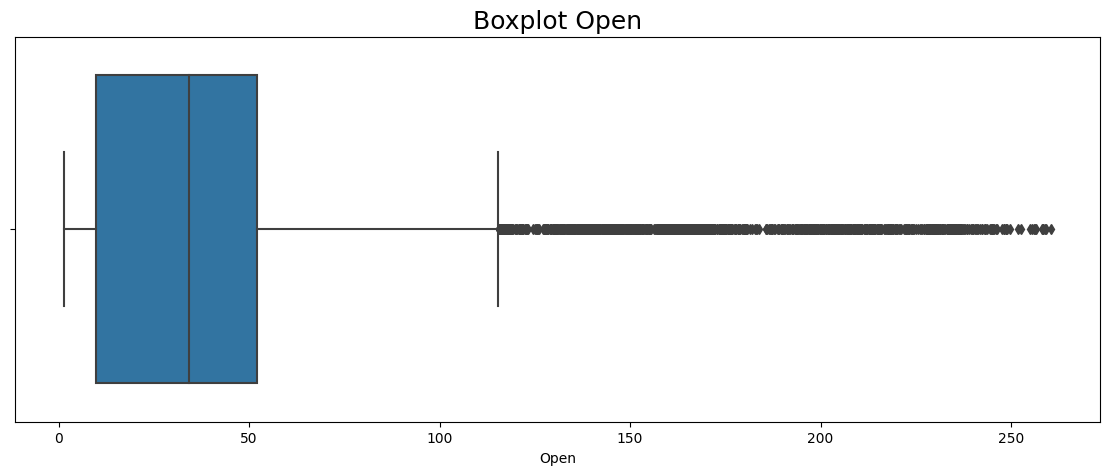

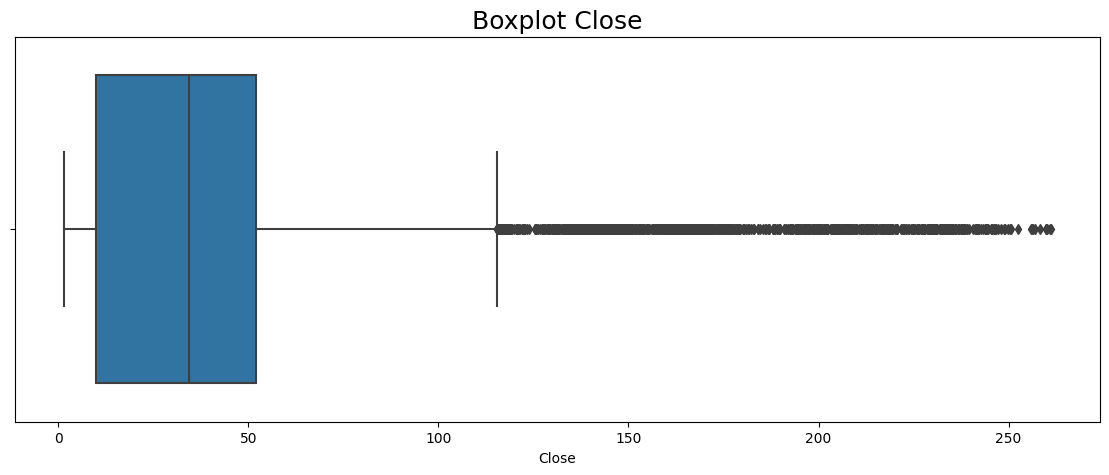

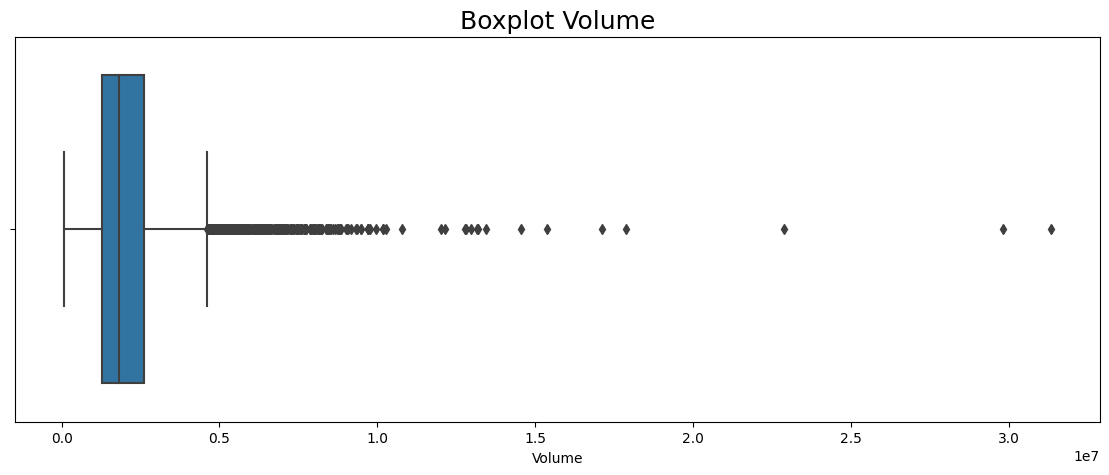

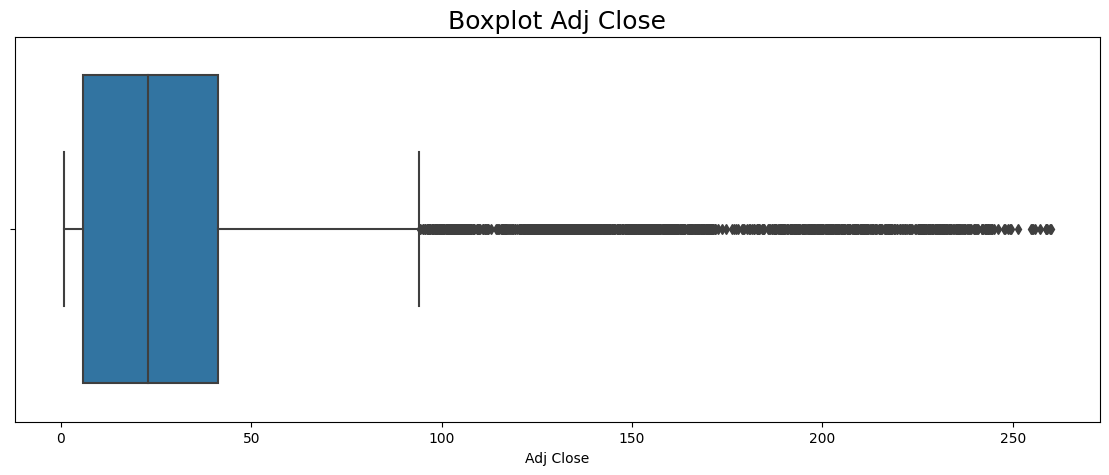

In [10]:
for i in df.columns[1:]:
    plt.figure(figsize=(14,5))
    ax = sns.boxplot(data = df, x = i)
    plt.title('Boxplot {}'.format(i), fontsize = 18)

<ipython-input-11-494194cbe8a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[i])
<ipython-input-11-494194cbe8a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df[i])
<ipython-input-11-494194cbe8a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in s

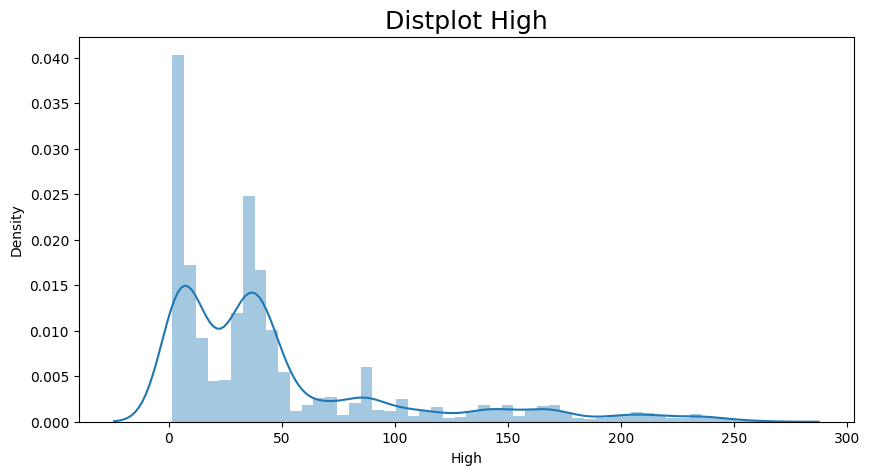

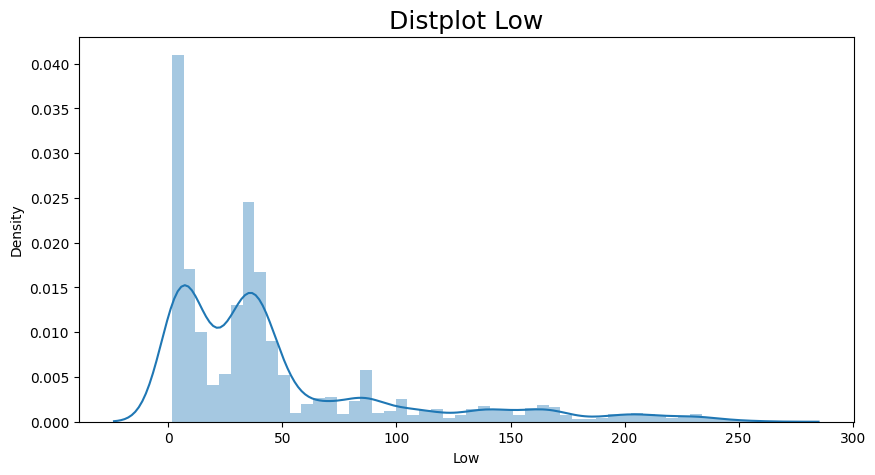

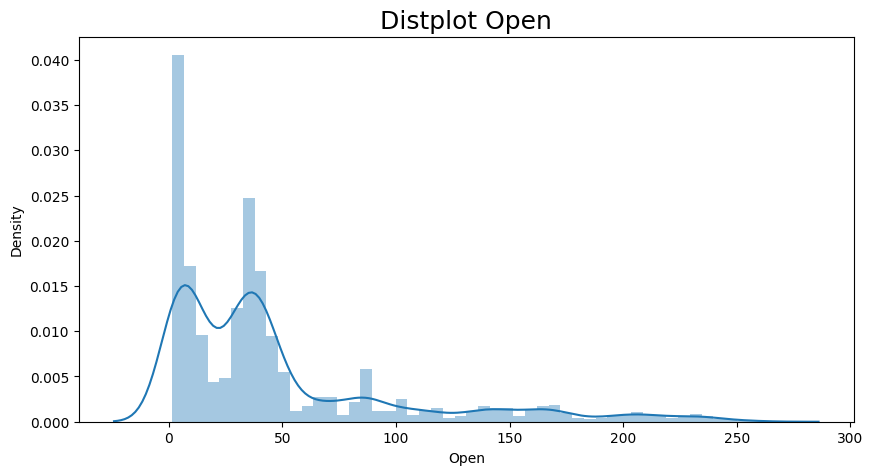

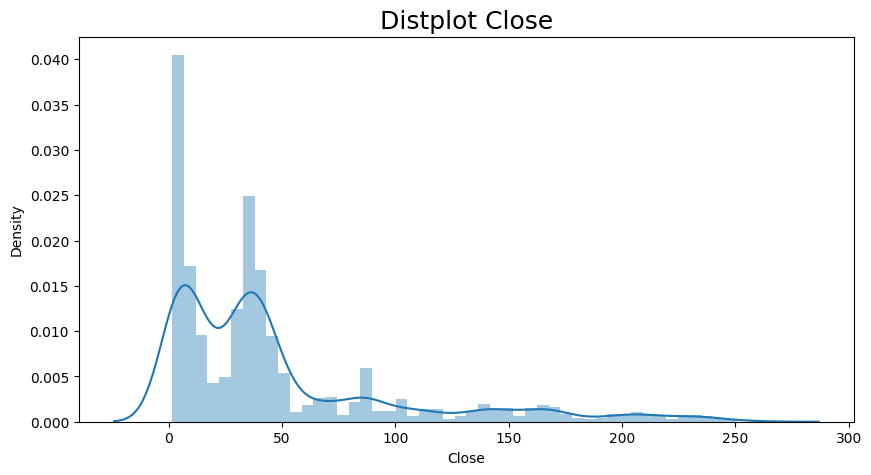

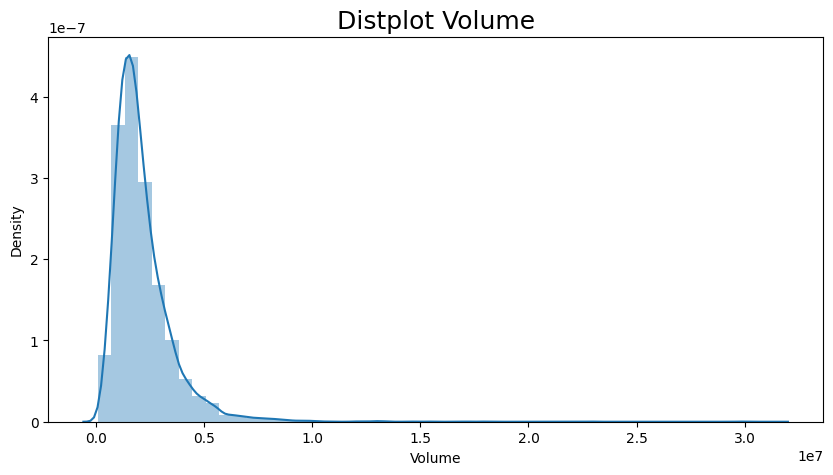

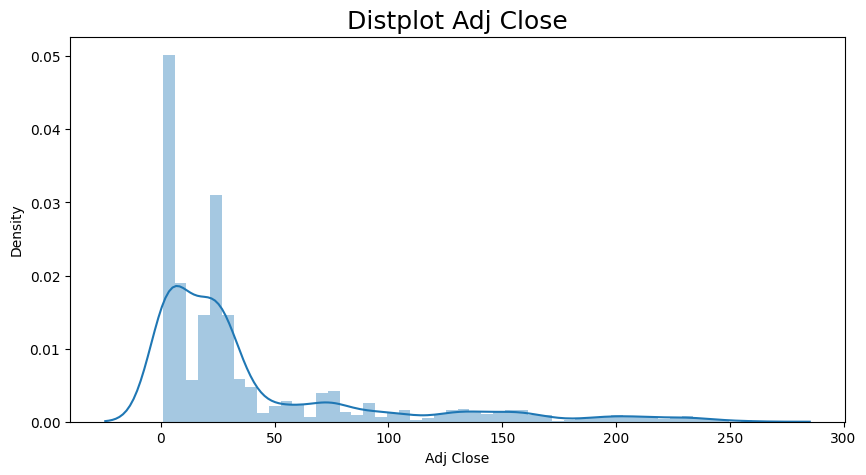

In [11]:
for i in df.columns[1:]:
    plt.figure(figsize=(10,5))
    ax = sns.distplot(df[i])
    plt.title('Distplot {}'.format(i), fontsize = 18)

In [12]:
df.corr()

<ipython-input-12-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.999878,0.999927,0.999924,0.032095,0.996287
Low,0.999878,1.000000,0.999913,0.999917,0.027961,0.996231
Open,0.999927,0.999913,1.000000,0.999844,0.030008,0.996186
Close,0.999924,0.999917,0.999844,1.000000,0.030142,0.996333
Volume,0.032095,0.027961,0.030008,0.030142,1.000000,0.011046
Adj Close,0.996287,0.996231,0.996186,0.996333,0.011046,1.000000


[]

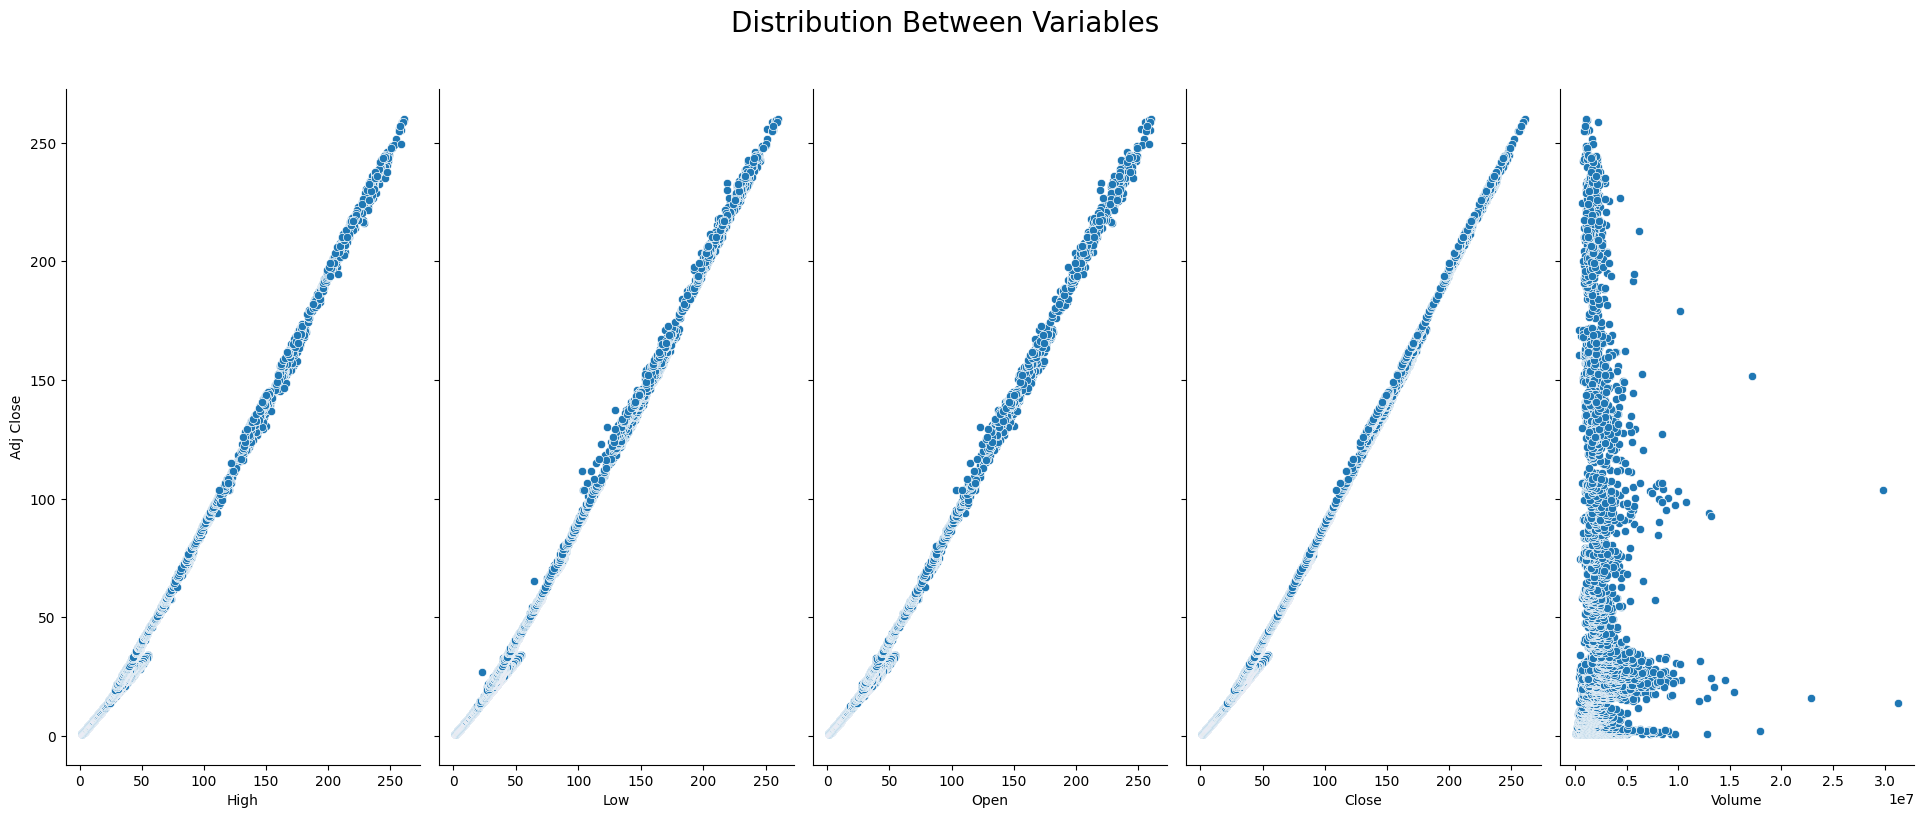

In [13]:
ax = sns.pairplot(data=df, y_vars = 'Adj Close', x_vars = ['High', 'Low', 'Open', 'Close', 'Volume'])
ax.figure.set_size_inches(20, 9)
ax.fig.suptitle('Distribution Between Variables', fontsize=20, y=1.05)
plt.plot()

##LSTM model

In [14]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [15]:
# Preprocess the data
data = df.filter(['Close']).values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [16]:
# Define the training data
train_data = scaled_data[:int(len(data) * 0.8)]
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [17]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [18]:
# Compile and train the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
7924/7924 [==============================] - 270s 33ms/step - loss: 5.6685e-05
Epoch 2/5
7924/7924 [==============================] - 260s 33ms/step - loss: 2.4184e-05
Epoch 3/5
7924/7924 [==============================] - 265s 33ms/step - loss: 1.6174e-05
Epoch 4/5
7924/7924 [==============================] - 269s 34ms/step - loss: 1.3666e-05
Epoch 5/5
7924/7924 [==============================] - 267s 34ms/step - loss: 1.2389e-05


In [19]:
# Predict the stock prices
test_data = scaled_data[int(len(data) * 0.8) - 60:]
x_test = []
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [20]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

63/63 [==============================] - 2s 19ms/step


In [21]:
# Print the predicted prices
for prediction in predictions:
    print(prediction)

[87.80029]
[87.522575]
[87.56784]
[87.63887]
[87.40533]
[87.16148]
[86.81537]
[85.66265]
[86.08876]
[84.0373]
[84.25167]
[84.43476]
[86.41008]
[87.61477]
[86.66657]
[87.40542]
[86.76273]
[86.782425]
[86.719444]
[86.42504]
[85.65549]
[84.864044]
[84.763]
[84.77761]
[84.16243]
[84.8788]
[86.896866]
[86.46177]
[85.92372]
[85.52632]
[85.21406]
[85.19152]
[86.14096]
[86.68082]
[86.3129]
[88.304214]
[88.64424]
[88.3546]
[87.21799]
[85.92962]
[85.66999]
[83.92153]
[84.86673]
[86.789734]
[88.56306]
[89.25392]
[88.34674]
[87.59776]
[87.93754]
[88.32159]
[89.39985]
[90.53503]
[88.90872]
[89.16872]
[89.24108]
[90.31808]
[90.92793]
[91.06227]
[90.790184]
[90.45401]
[90.40018]
[91.79974]
[90.43379]
[88.15957]
[88.08589]
[87.417755]
[88.437744]
[86.88768]
[86.65236]
[88.018]
[87.67965]
[89.17265]
[88.46238]
[89.07959]
[89.03116]
[89.431946]
[88.957375]
[88.56199]
[86.23158]
[85.75062]
[86.02441]
[87.54525]
[87.52269]
[87.11185]
[87.61533]
[87.92952]
[87.54933]
[88.20639]
[88.259445]
[88.00616]
[87.5

##fine

In [22]:
y = df['Adj Close']

In [23]:
X = df.drop(['Date', 'Adj Close'], axis =1)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
print('R² = {}'.format(model.score(X_train, y_train).round(6)))

R² = 0.993255


In [27]:
y_previsto = model.predict(X_test)
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(5)))

R² = 0.99244
